<a href="https://colab.research.google.com/github/JeelCueva/omega-data-website/blob/main/CHULLAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANÁLISIS ESTADÍSTICO Y ECONOMÉTRICO - COSTOS AGRÍCOLAS CHULLAY

1. CARGANDO Y PREPARANDO DATOS...
Datos cargados: 54 observaciones, 21 variables

Periodos: [np.float64(1.0), np.float64(2.0), np.float64(3.0)]
Parcelas: 18 parcelas únicas

2. ANÁLISIS ESTADÍSTICO DESCRIPTIVO

2.1 ESTADÍSTICAS DESCRIPTIVAS GENERALES
--------------------------------------------------------------------------------
       Area total m2  Mano de obra    Semillas  Fertilizantes  Pesticidas  \
count      54.000000     54.000000   54.000000      54.000000   54.000000   
mean     6850.000000    183.018519   20.148148      35.037037    5.537037   
std      8953.606841    171.251422   62.183965     107.073941   24.272597   
min         0.000000      0.000000    0.000000       0.000000    0.000000   
25%      2500.000000     40.000000    0.000000       0.000000    0.000000   
50%      2900.000000    120.000000    0.000000       0.000000    0.000000   
75%     10000.000000    240.000000    0.000000       0.000000    

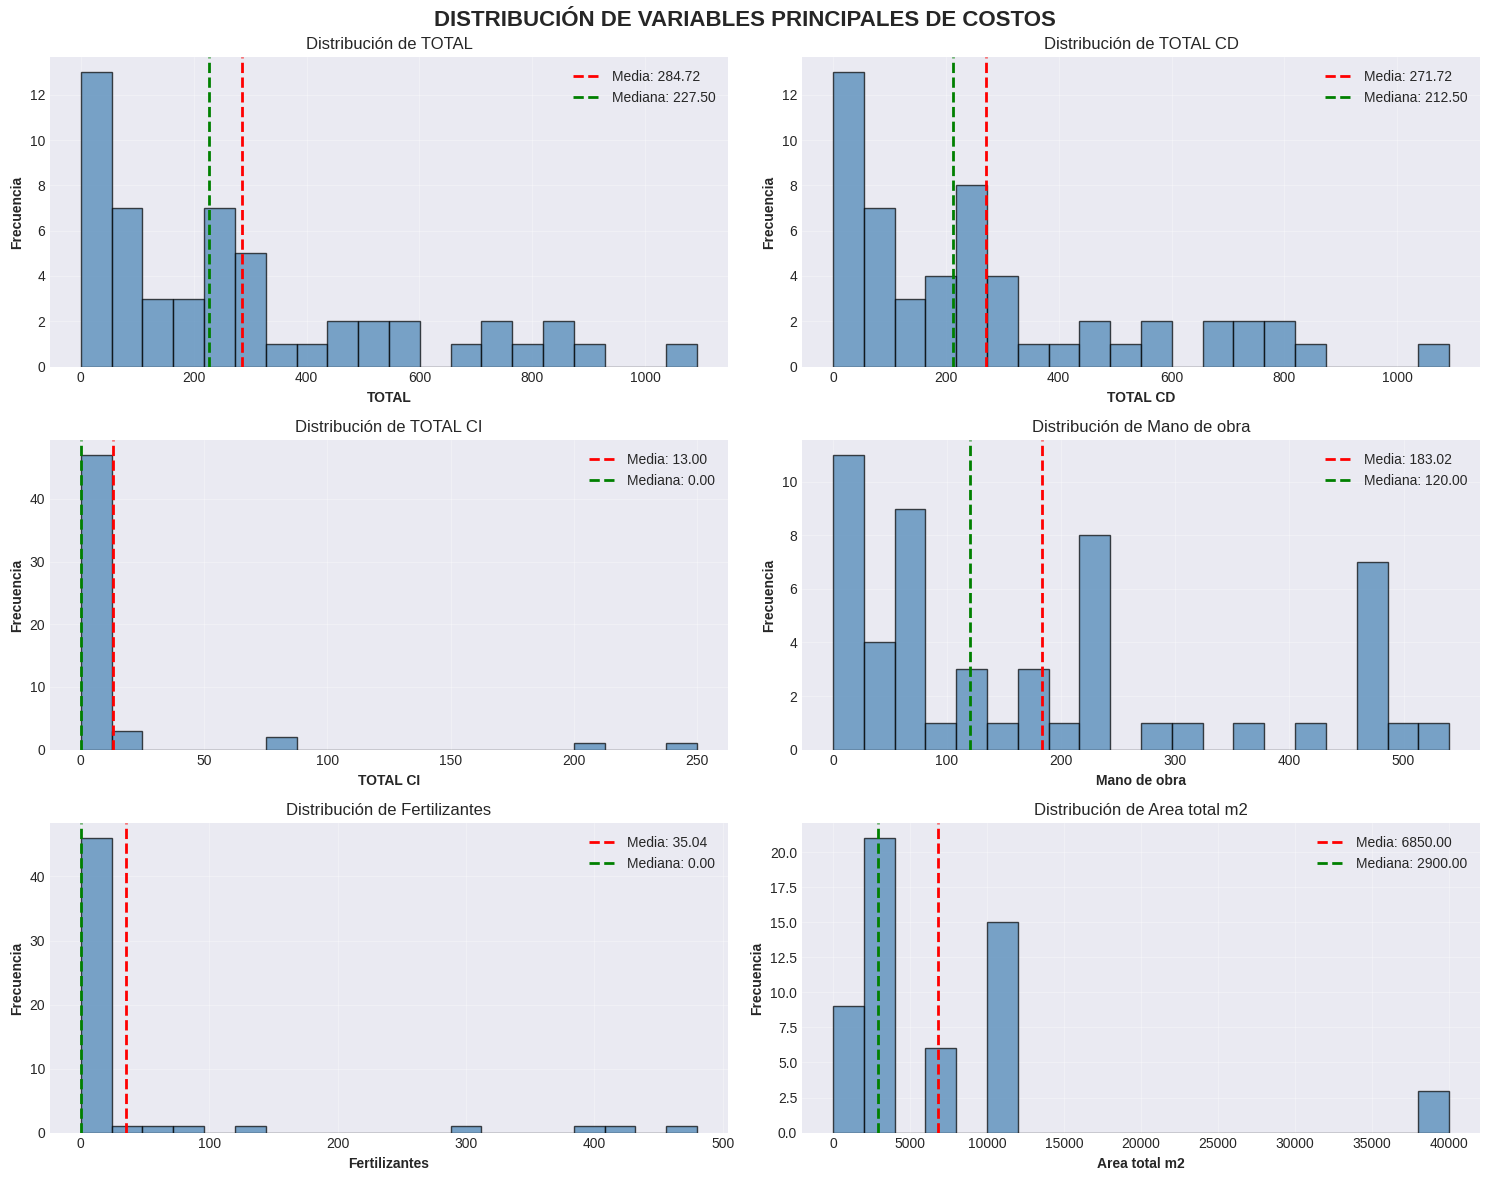

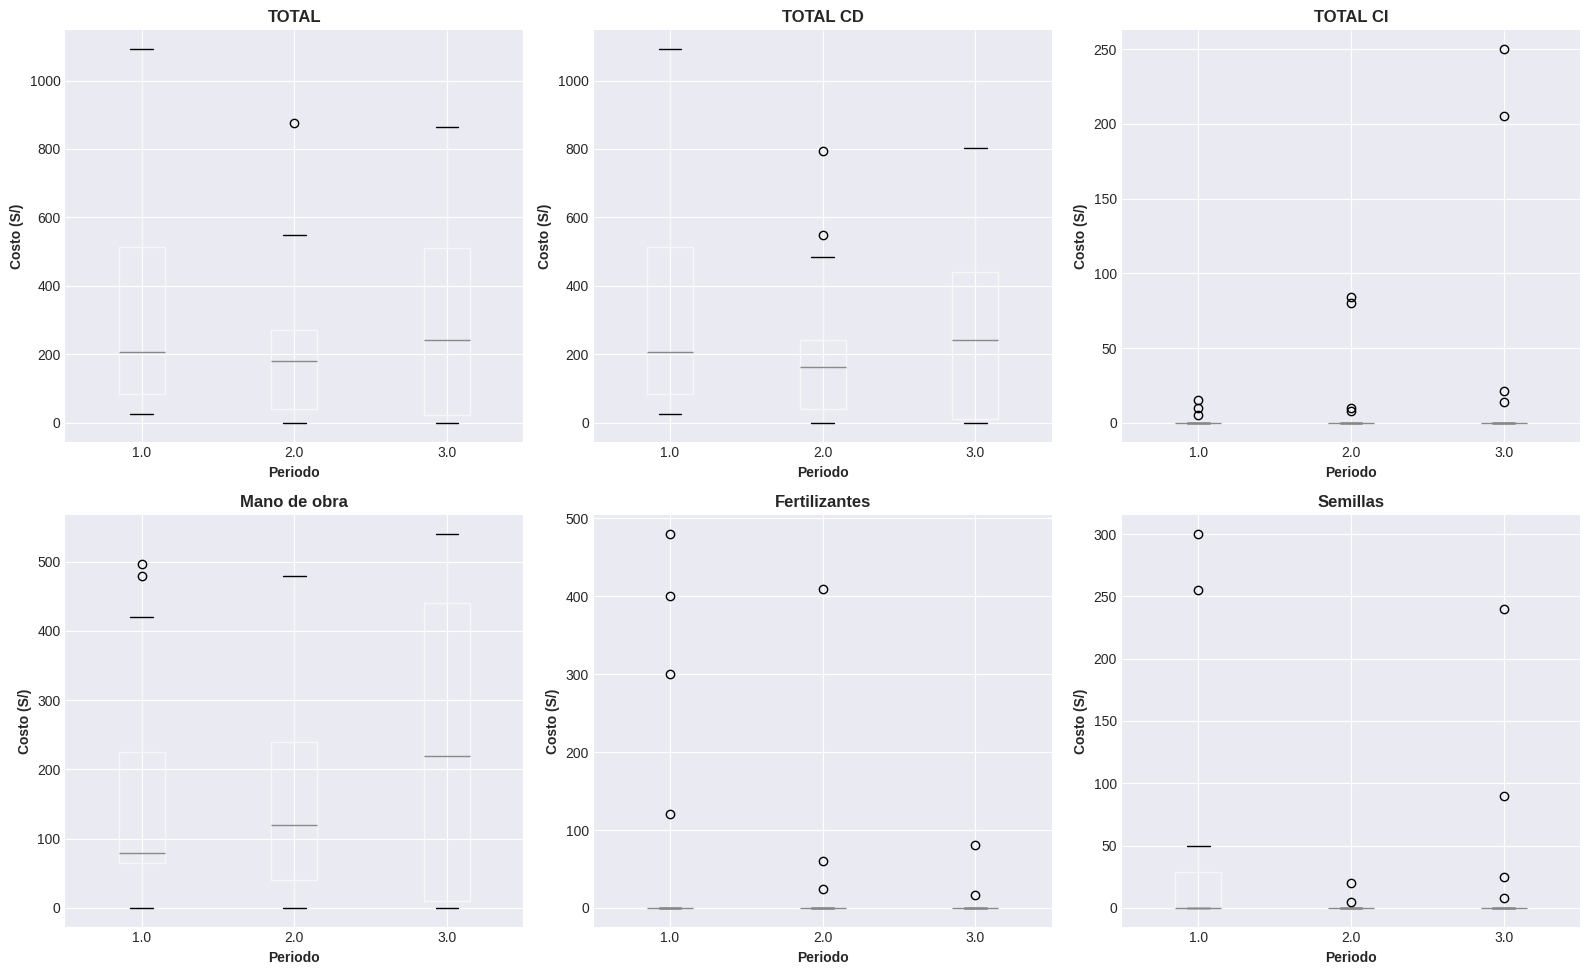

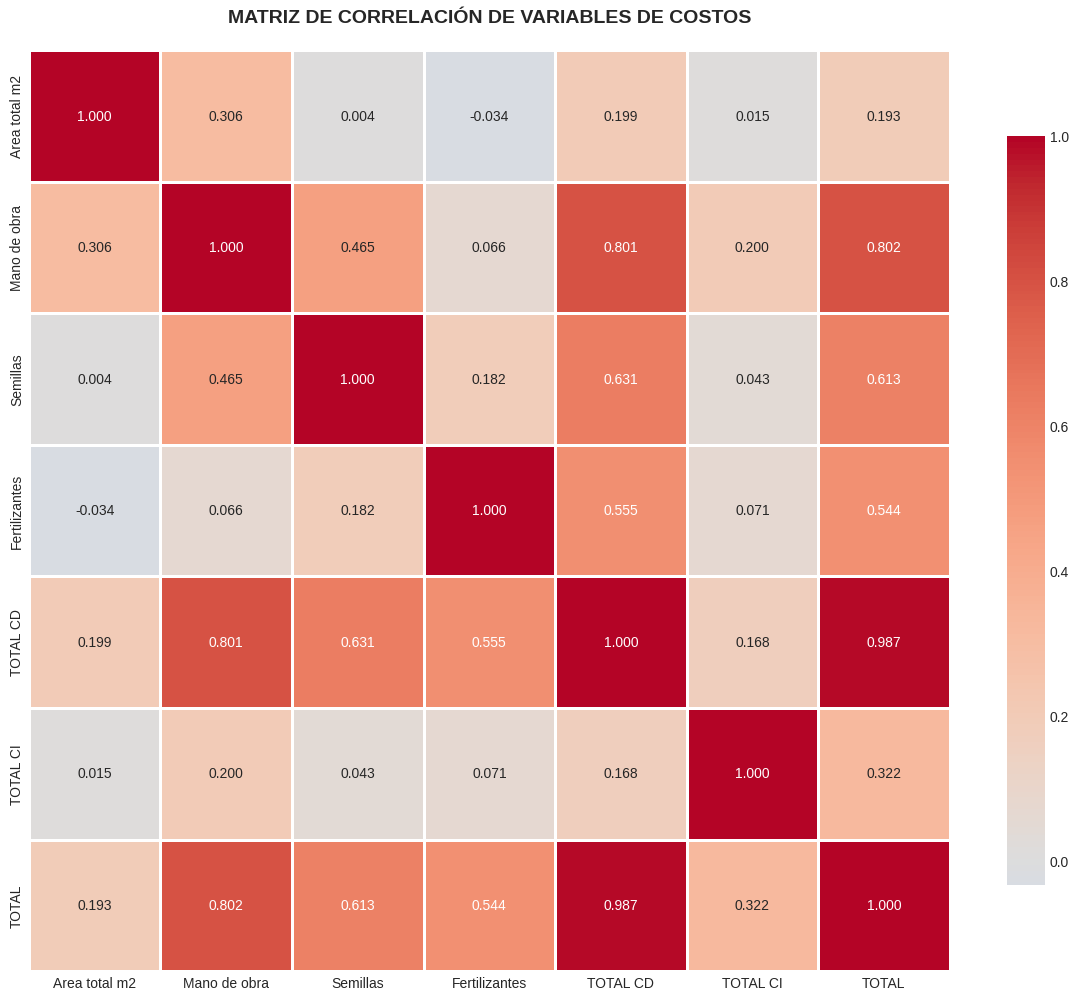

<Figure size 1200x600 with 0 Axes>

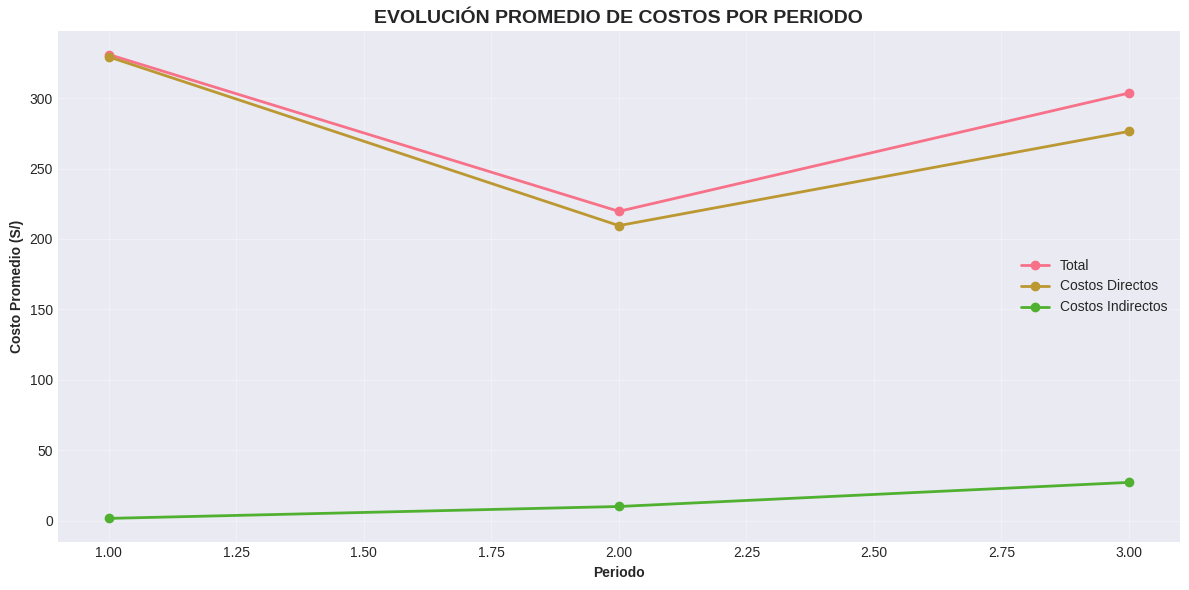

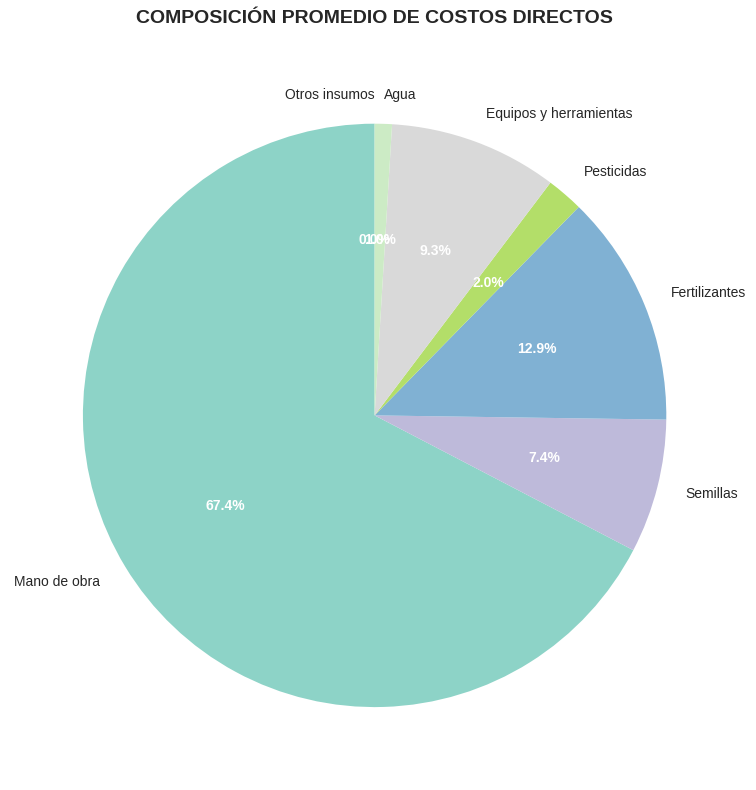

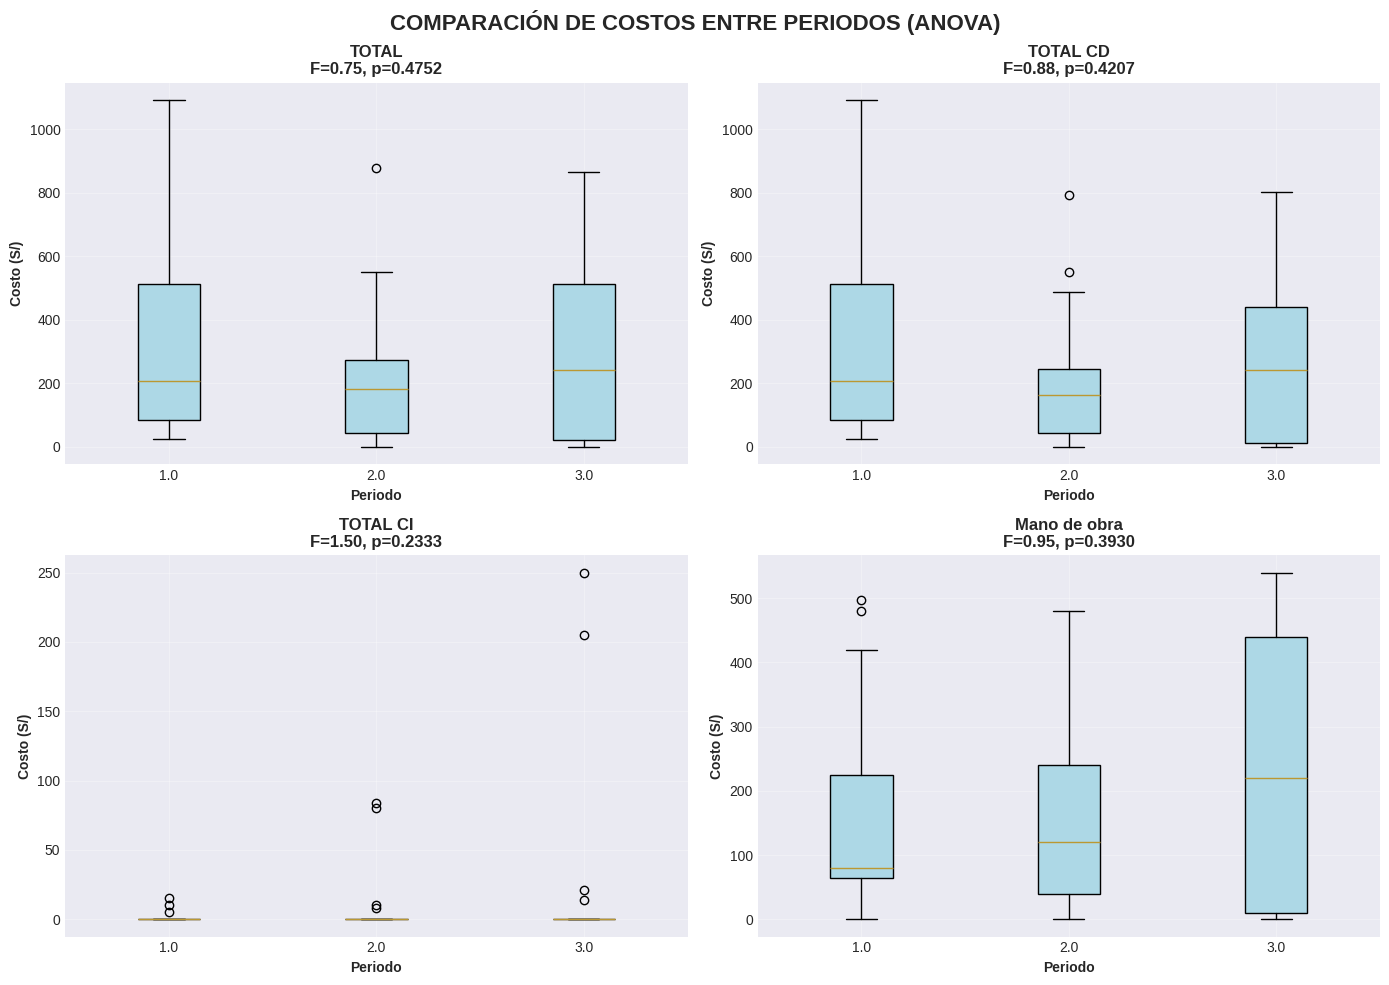

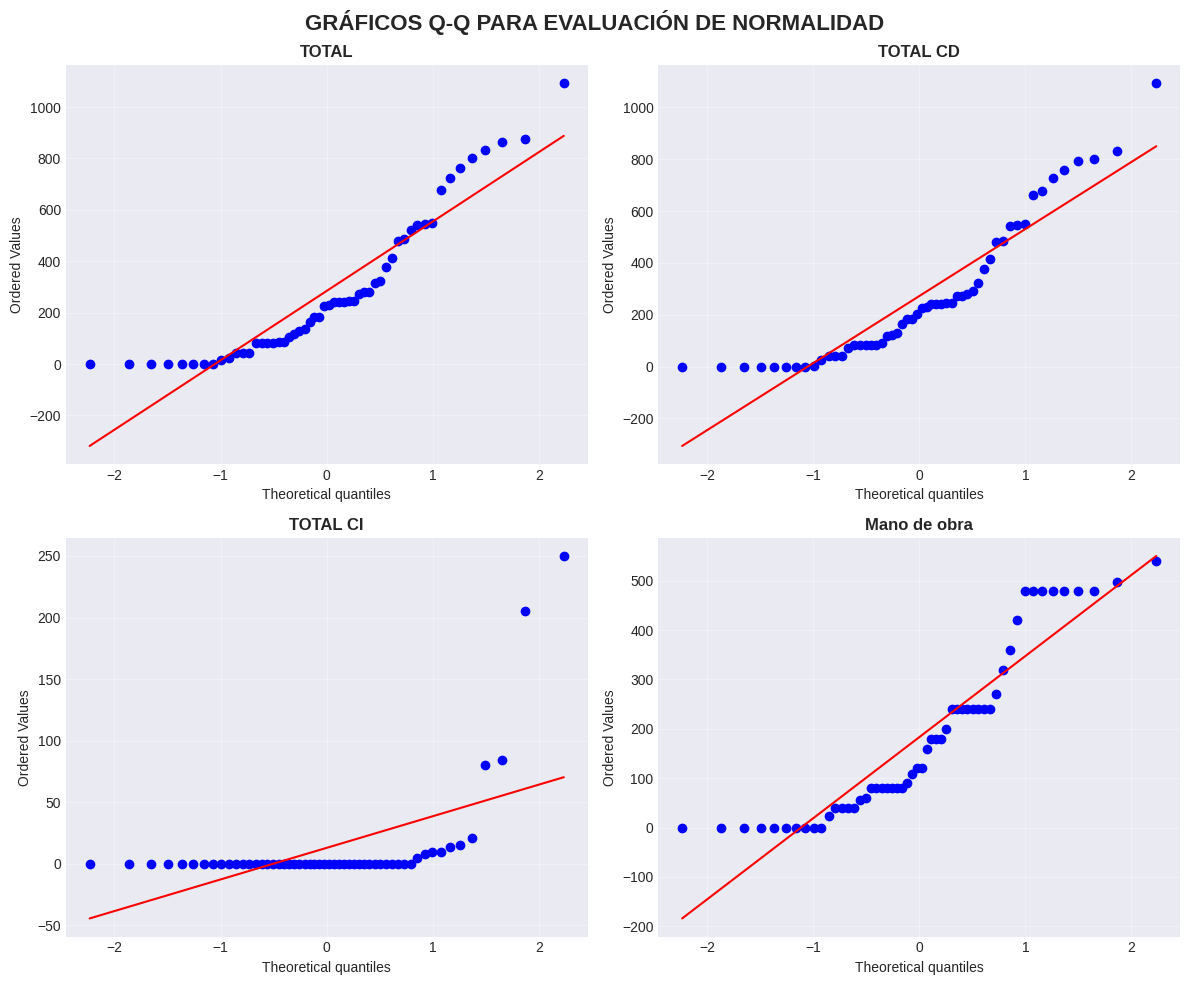

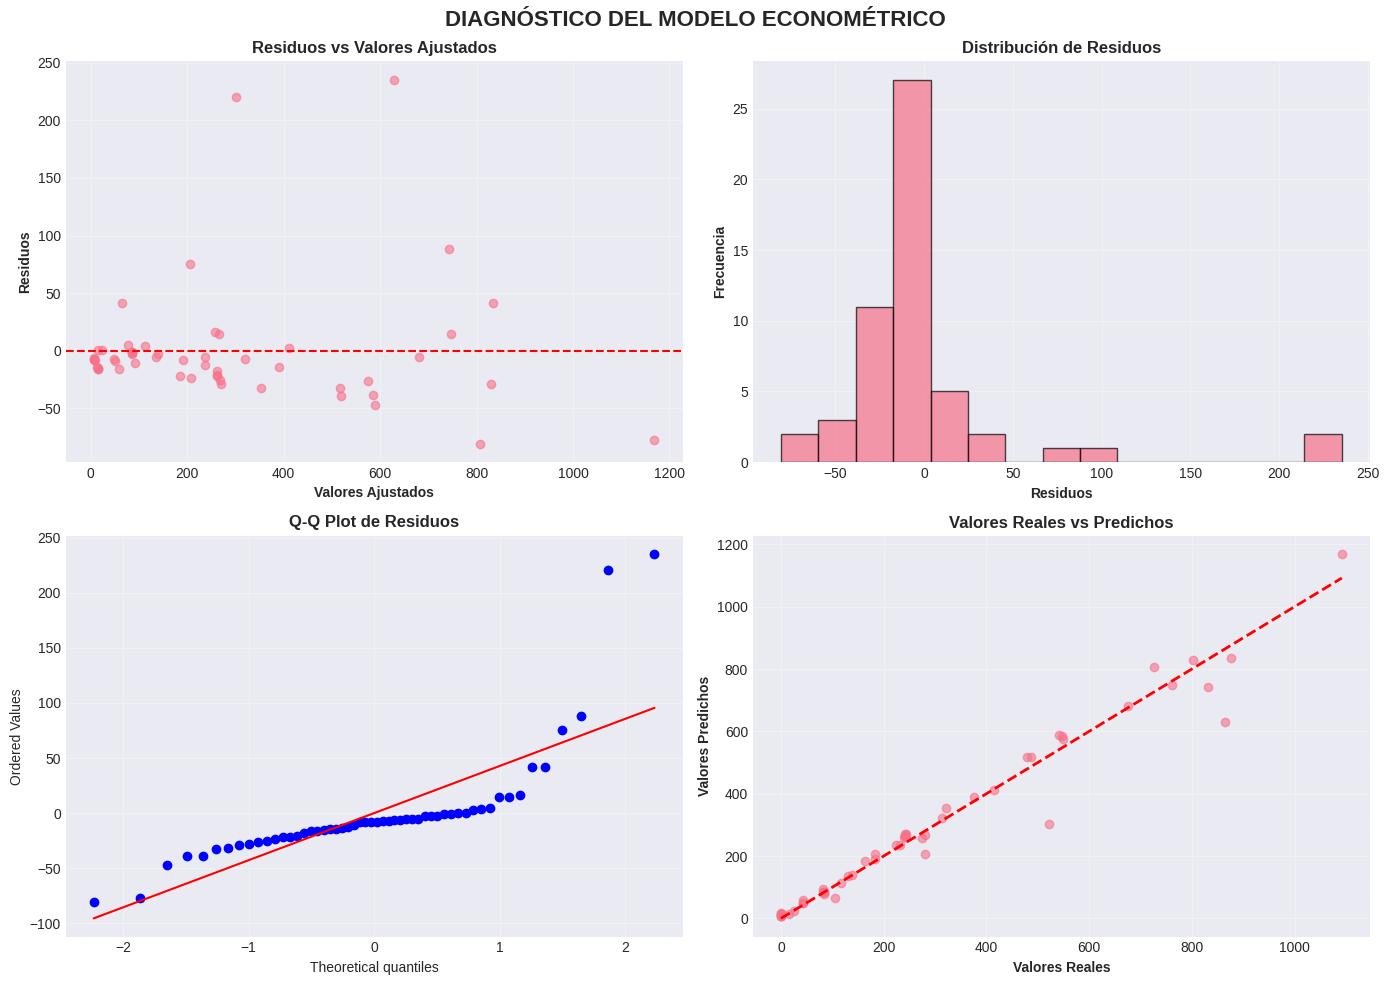

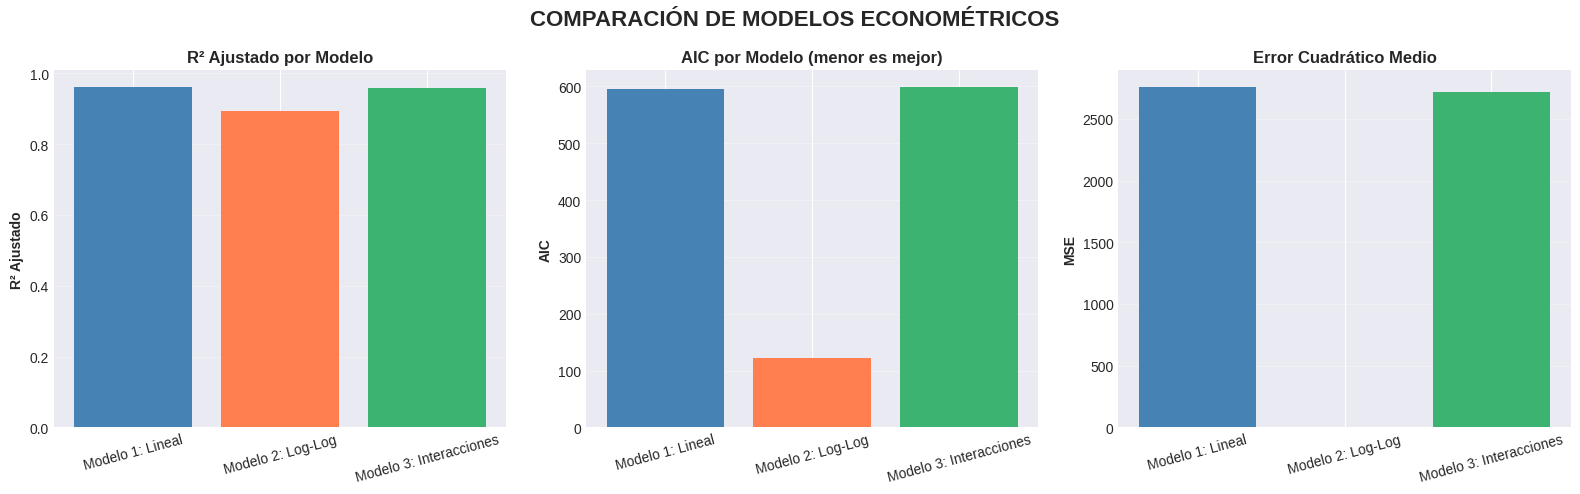

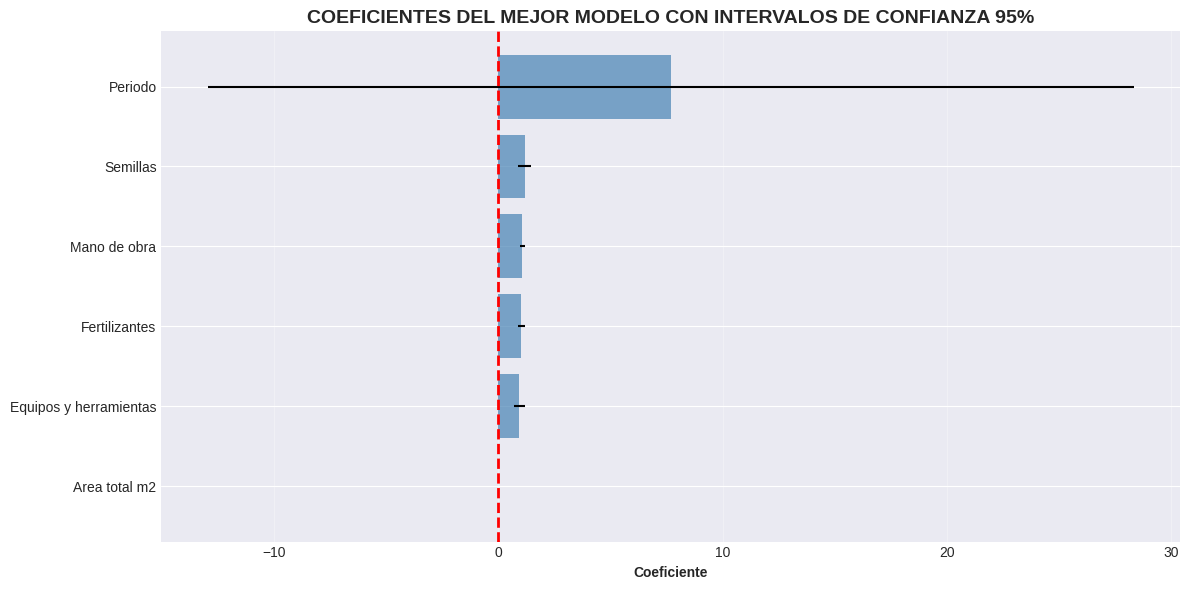

In [10]:
# UNIVERSIDAD NACIONAL HERMILIO VALDIZÁN
# MSc. JEEL CUEVA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo para gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("="*80)
print("ANÁLISIS ESTADÍSTICO Y ECONOMÉTRICO - COSTOS AGRÍCOLAS CHULLAY")
print("="*80)

# ============================================================================
# 1. CARGA Y PREPARACIÓN DE DATOS
# ============================================================================
print("\n1. CARGANDO Y PREPARANDO DATOS...")

file_path = '/content/COSTOS_DE_20_PARCELAS-CHULLAY-PERIODO_1,_2_Y_3(1).xlsx'
df = pd.read_excel(file_path, sheet_name='RESUMEN')

# Eliminar filas con todos NaN
df = df.dropna(how='all')

# Eliminar la última fila si es solo totales
df = df[df['Periodo'].notna()]

print(f"Datos cargados: {df.shape[0]} observaciones, {df.shape[1]} variables")
print(f"\nPeriodos: {sorted(df['Periodo'].unique())}")
print(f"Parcelas: {len(df['Parcelas'].unique())} parcelas únicas")

# Guardar dataset limpio
df.to_csv('/content/datos_limpios.csv', index=False)

# ============================================================================
# 2. ESTADÍSTICA DESCRIPTIVA
# ============================================================================
print("\n" + "="*80)
print("2. ANÁLISIS ESTADÍSTICO DESCRIPTIVO")
print("="*80)

# 2.1 Estadísticas descriptivas generales
print("\n2.1 ESTADÍSTICAS DESCRIPTIVAS GENERALES")
print("-"*80)

# Seleccionar variables numéricas
variables_numericas = ['Area total m2', 'Mano de obra', 'Semillas', 'Fertilizantes',
                       'Pesticidas', 'Equipos y herramientas', 'Agua', 'Otros insumos',
                       'TOTAL CD', 'Infraestructura', 'Mantenimiento',
                       'Gastos administrativos', 'Servicios com.', 'Capacitación y T.',
                       'Imprevistos', 'Otros costos', 'TOTAL CI', 'TOTAL']

desc_stats = df[variables_numericas].describe()
print(desc_stats)

# Guardar estadísticas descriptivas
desc_stats.to_csv('/content/estadisticas_descriptivas.csv')

# 2.2 Gráficos de distribución
print("\n2.2 Generando gráficos de distribución...")

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('DISTRIBUCIÓN DE VARIABLES PRINCIPALES DE COSTOS', fontsize=16, fontweight='bold')

variables_principales = ['TOTAL', 'TOTAL CD', 'TOTAL CI', 'Mano de obra', 'Fertilizantes', 'Area total m2']

for idx, var in enumerate(variables_principales):
    ax = axes[idx//2, idx%2]
    ax.hist(df[var], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
    ax.set_xlabel(var, fontweight='bold')
    ax.set_ylabel('Frecuencia', fontweight='bold')
    ax.set_title(f'Distribución de {var}')
    ax.grid(True, alpha=0.3)

    # Agregar estadísticas
    media = df[var].mean()
    mediana = df[var].median()
    ax.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
    ax.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')
    ax.legend()

plt.tight_layout()
plt.savefig('/content/grafico_01_distribuciones.png', dpi=300, bbox_inches='tight')


# 2.3 Boxplots por periodo
print("\n2.3 Generando boxplots por periodo...")

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('ANÁLISIS DE COSTOS POR PERIODO', fontsize=16, fontweight='bold')

variables_box = ['TOTAL', 'TOTAL CD', 'TOTAL CI', 'Mano de obra', 'Fertilizantes', 'Semillas']

for idx, var in enumerate(variables_box):
    ax = axes[idx//3, idx%3]
    df.boxplot(column=var, by='Periodo', ax=ax)
    ax.set_title(var, fontweight='bold')
    ax.set_xlabel('Periodo', fontweight='bold')
    ax.set_ylabel('Costo (S/)', fontweight='bold')
    ax.get_figure().suptitle('')

plt.tight_layout()
plt.savefig('/content/grafico_02_boxplots_periodo.png', dpi=300, bbox_inches='tight')


# 2.4 Matriz de correlación
print("\n2.4 Generando matriz de correlación...")

variables_correlacion = ['Area total m2', 'Mano de obra', 'Semillas', 'Fertilizantes',
                         'TOTAL CD', 'TOTAL CI', 'TOTAL']

correlacion = df[variables_correlacion].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('MATRIZ DE CORRELACIÓN DE VARIABLES DE COSTOS', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('/content/grafico_03_matriz_correlacion.png', dpi=300, bbox_inches='tight')


# 2.5 Evolución temporal de costos
print("\n2.5 Generando gráficos de evolución temporal...")

costos_por_periodo = df.groupby('Periodo')[['TOTAL', 'TOTAL CD', 'TOTAL CI']].mean()

plt.figure(figsize=(12, 6))
costos_por_periodo.plot(marker='o', linewidth=2)
plt.title('EVOLUCIÓN PROMEDIO DE COSTOS POR PERIODO', fontsize=14, fontweight='bold')
plt.xlabel('Periodo', fontweight='bold')
plt.ylabel('Costo Promedio (S/)', fontweight='bold')
plt.legend(['Total', 'Costos Directos', 'Costos Indirectos'], loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/content/grafico_04_evolucion_temporal.png', dpi=300, bbox_inches='tight')


# 2.6 Composición de costos
print("\n2.6 Generando gráfico de composición de costos...")

componentes_cd = ['Mano de obra', 'Semillas', 'Fertilizantes', 'Pesticidas',
                  'Equipos y herramientas', 'Agua', 'Otros insumos']
promedios_cd = df[componentes_cd].mean()

plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(componentes_cd)))
wedges, texts, autotexts = plt.pie(promedios_cd, labels=componentes_cd, autopct='%1.1f%%',
                                     colors=colors, startangle=90)
plt.title('COMPOSICIÓN PROMEDIO DE COSTOS DIRECTOS', fontsize=14, fontweight='bold', pad=20)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
plt.tight_layout()
plt.savefig('/content/grafico_05_composicion_costos.png', dpi=300, bbox_inches='tight')


# ============================================================================
# 3. ESTADÍSTICA INFERENCIAL
# ============================================================================
print("\n" + "="*80)
print("3. ANÁLISIS ESTADÍSTICO INFERENCIAL")
print("="*80)

# 3.1 Pruebas de normalidad
print("\n3.1 PRUEBAS DE NORMALIDAD (Shapiro-Wilk)")
print("-"*80)

normalidad_resultados = {}
for var in ['TOTAL', 'TOTAL CD', 'TOTAL CI', 'Mano de obra']:
    stat, p_value = stats.shapiro(df[var])
    normalidad_resultados[var] = {'estadistico': stat, 'p_valor': p_value}
    print(f"{var:20s}: Estadístico={stat:.4f}, p-valor={p_value:.4f} - {'Normal' if p_value > 0.05 else 'No Normal'}")

# 3.2 ANOVA - Diferencias entre periodos
print("\n3.2 ANÁLISIS DE VARIANZA (ANOVA) - DIFERENCIAS ENTRE PERIODOS")
print("-"*80)

variables_anova = ['TOTAL', 'TOTAL CD', 'TOTAL CI', 'Mano de obra']

anova_resultados = {}
for var in variables_anova:
    grupos = [df[df['Periodo'] == p][var].values for p in sorted(df['Periodo'].unique())]
    f_stat, p_value = stats.f_oneway(*grupos)
    anova_resultados[var] = {'F': f_stat, 'p_valor': p_value}
    print(f"{var:20s}: F={f_stat:.4f}, p-valor={p_value:.4f} - {'Hay diferencias significativas' if p_value < 0.05 else 'No hay diferencias significativas'}")

# Visualización ANOVA
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('COMPARACIÓN DE COSTOS ENTRE PERIODOS (ANOVA)', fontsize=16, fontweight='bold')

for idx, var in enumerate(variables_anova):
    ax = axes[idx//2, idx%2]
    periodos = sorted(df['Periodo'].unique())
    datos_periodos = [df[df['Periodo'] == p][var].values for p in periodos]

    bp = ax.boxplot(datos_periodos, labels=periodos, patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('lightblue')

    ax.set_title(f'{var}\nF={anova_resultados[var]["F"]:.2f}, p={anova_resultados[var]["p_valor"]:.4f}',
                 fontweight='bold')
    ax.set_xlabel('Periodo', fontweight='bold')
    ax.set_ylabel('Costo (S/)', fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/grafico_06_anova_periodos.png', dpi=300, bbox_inches='tight')


# 3.3 Pruebas t para diferencias entre costos directos e indirectos
print("\n3.3 PRUEBA T DE STUDENT - COMPARACIÓN CD vs CI")
print("-"*80)

t_stat, p_value = stats.ttest_rel(df['TOTAL CD'], df['TOTAL CI'])
print(f"Estadístico t: {t_stat:.4f}")
print(f"P-valor: {p_value:.4f}")
print(f"Conclusión: {'Los costos directos son significativamente diferentes de los indirectos' if p_value < 0.05 else 'No hay diferencia significativa'}")

# 3.4 Intervalos de confianza
print("\n3.4 INTERVALOS DE CONFIANZA (95%)")
print("-"*80)

for var in ['TOTAL', 'TOTAL CD', 'TOTAL CI']:
    media = df[var].mean()
    std_error = stats.sem(df[var])
    ci = stats.t.interval(0.95, len(df[var])-1, loc=media, scale=std_error)
    print(f"{var:15s}: Media={media:8.2f}, IC 95%=[{ci[0]:8.2f}, {ci[1]:8.2f}]")

# 3.5 Gráfico Q-Q para normalidad
print("\n3.5 Generando gráficos Q-Q...")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('GRÁFICOS Q-Q PARA EVALUACIÓN DE NORMALIDAD', fontsize=16, fontweight='bold')

variables_qq = ['TOTAL', 'TOTAL CD', 'TOTAL CI', 'Mano de obra']

for idx, var in enumerate(variables_qq):
    ax = axes[idx//2, idx%2]
    stats.probplot(df[var], dist="norm", plot=ax)
    ax.set_title(f'{var}', fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/grafico_07_qq_plots.png', dpi=300, bbox_inches='tight')


# ============================================================================
# 4. ANÁLISIS ECONOMÉTRICO
# ============================================================================
print("\n" + "="*80)
print("4. ANÁLISIS ECONOMÉTRICO")
print("="*80)

# 4.1 Preparación de datos para modelado
print("\n4.1 Preparando datos para modelado econométrico...")

# Variable dependiente: TOTAL
# Variables independientes: Area, Mano de obra, Semillas, Fertilizantes, Periodo

X_vars = ['Area total m2', 'Mano de obra', 'Semillas', 'Fertilizantes',
          'Equipos y herramientas', 'Periodo']
y_var = 'TOTAL'

# Crear dataset completo sin valores faltantes
df_model = df[X_vars + [y_var]].dropna()

print(f"Observaciones para modelado: {len(df_model)}")

# 4.2 Modelo 1: Regresión Lineal Múltiple Simple
print("\n4.2 MODELO 1: REGRESIÓN LINEAL MÚLTIPLE SIMPLE")
print("-"*80)

X = df_model[X_vars]
y = df_model[y_var]

# Agregar constante
X_const = sm.add_constant(X)

# Estimar modelo
modelo1 = sm.OLS(y, X_const).fit()

print(modelo1.summary())

# 4.3 Diagnóstico del Modelo 1
print("\n4.3 DIAGNÓSTICO DEL MODELO 1")
print("-"*80)

# Multicolinealidad - VIF
print("\nFactores de Inflación de la Varianza (VIF):")
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

# Heteroscedasticidad - Breusch-Pagan
bp_test = het_breuschpagan(modelo1.resid, modelo1.model.exog)
print(f"\nPrueba de Heteroscedasticidad Breusch-Pagan:")
print(f"  Estadístico LM: {bp_test[0]:.4f}")
print(f"  P-valor: {bp_test[1]:.4f}")
print(f"  Conclusión: {'Hay heteroscedasticidad' if bp_test[1] < 0.05 else 'No hay heteroscedasticidad'}")

# Autocorrelación - Durbin-Watson
dw = durbin_watson(modelo1.resid)
print(f"\nEstadístico Durbin-Watson: {dw:.4f}")
print(f"  Interpretación: {'No hay autocorrelación' if 1.5 < dw < 2.5 else 'Posible autocorrelación'}")

# 4.4 Gráficos de diagnóstico del modelo
print("\n4.4 Generando gráficos de diagnóstico...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('DIAGNÓSTICO DEL MODELO ECONOMÉTRICO', fontsize=16, fontweight='bold')

# Residuos vs Valores ajustados
axes[0, 0].scatter(modelo1.fittedvalues, modelo1.resid, alpha=0.6)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Valores Ajustados', fontweight='bold')
axes[0, 0].set_ylabel('Residuos', fontweight='bold')
axes[0, 0].set_title('Residuos vs Valores Ajustados', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Distribución de residuos
axes[0, 1].hist(modelo1.resid, bins=15, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Residuos', fontweight='bold')
axes[0, 1].set_ylabel('Frecuencia', fontweight='bold')
axes[0, 1].set_title('Distribución de Residuos', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Q-Q plot de residuos
stats.probplot(modelo1.resid, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot de Residuos', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Valores reales vs predichos
axes[1, 1].scatter(y, modelo1.fittedvalues, alpha=0.6)
axes[1, 1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[1, 1].set_xlabel('Valores Reales', fontweight='bold')
axes[1, 1].set_ylabel('Valores Predichos', fontweight='bold')
axes[1, 1].set_title('Valores Reales vs Predichos', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/grafico_08_diagnostico_modelo.png', dpi=300, bbox_inches='tight')


# 4.5 Modelo 2: Con variables logarítmicas
print("\n4.5 MODELO 2: MODELO LOG-LOG")
print("-"*80)

# Transformar variables (agregar pequeña constante para evitar log(0))
X_log = np.log(X + 1)
y_log = np.log(y + 1)

X_log_const = sm.add_constant(X_log)
modelo2 = sm.OLS(y_log, X_log_const).fit()

print(modelo2.summary())

# 4.6 Modelo 3: Modelo con interacciones
print("\n4.6 MODELO 3: MODELO CON INTERACCIONES")
print("-"*80)

# Crear interacciones
df_model['Area_ManoObra'] = df_model['Area total m2'] * df_model['Mano de obra']
df_model['Area_Fertilizantes'] = df_model['Area total m2'] * df_model['Fertilizantes']

X_inter = df_model[X_vars + ['Area_ManoObra', 'Area_Fertilizantes']]
X_inter_const = sm.add_constant(X_inter)

modelo3 = sm.OLS(y, X_inter_const).fit()

print(modelo3.summary())

# 4.7 Comparación de modelos
print("\n4.7 COMPARACIÓN DE MODELOS")
print("-"*80)

modelos_comparacion = pd.DataFrame({
    'Modelo': ['Modelo 1: Lineal', 'Modelo 2: Log-Log', 'Modelo 3: Interacciones'],
    'R² Ajustado': [modelo1.rsquared_adj, modelo2.rsquared_adj, modelo3.rsquared_adj],
    'AIC': [modelo1.aic, modelo2.aic, modelo3.aic],
    'BIC': [modelo1.bic, modelo2.bic, modelo3.bic],
    'MSE': [np.mean(modelo1.resid**2), np.mean(modelo2.resid**2), np.mean(modelo3.resid**2)]
})

print(modelos_comparacion.to_string(index=False))

# Gráfico de comparación
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('COMPARACIÓN DE MODELOS ECONOMÉTRICOS', fontsize=16, fontweight='bold')

axes[0].bar(modelos_comparacion['Modelo'], modelos_comparacion['R² Ajustado'],
            color=['steelblue', 'coral', 'mediumseagreen'])
axes[0].set_ylabel('R² Ajustado', fontweight='bold')
axes[0].set_title('R² Ajustado por Modelo', fontweight='bold')
axes[0].tick_params(axis='x', rotation=15)
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(modelos_comparacion['Modelo'], modelos_comparacion['AIC'],
            color=['steelblue', 'coral', 'mediumseagreen'])
axes[1].set_ylabel('AIC', fontweight='bold')
axes[1].set_title('AIC por Modelo (menor es mejor)', fontweight='bold')
axes[1].tick_params(axis='x', rotation=15)
axes[1].grid(True, alpha=0.3, axis='y')

axes[2].bar(modelos_comparacion['Modelo'], modelos_comparacion['MSE'],
            color=['steelblue', 'coral', 'mediumseagreen'])
axes[2].set_ylabel('MSE', fontweight='bold')
axes[2].set_title('Error Cuadrático Medio', fontweight='bold')
axes[2].tick_params(axis='x', rotation=15)
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('/content/grafico_09_comparacion_modelos.png', dpi=300, bbox_inches='tight')


# 4.8 Selección del mejor modelo
print("\n4.8 SELECCIÓN DEL MEJOR MODELO")
print("-"*80)

mejor_idx = modelos_comparacion['R² Ajustado'].idxmax()
mejor_modelo_nombre = modelos_comparacion.loc[mejor_idx, 'Modelo']

print(f"\nMEJOR MODELO: {mejor_modelo_nombre}")
print(f"R² Ajustado: {modelos_comparacion.loc[mejor_idx, 'R² Ajustado']:.4f}")
print(f"AIC: {modelos_comparacion.loc[mejor_idx, 'AIC']:.2f}")
print(f"BIC: {modelos_comparacion.loc[mejor_idx, 'BIC']:.2f}")

# Seleccionar el mejor modelo para análisis final
if mejor_idx == 0:
    mejor_modelo = modelo1
elif mejor_idx == 1:
    mejor_modelo = modelo2
else:
    mejor_modelo = modelo3

# 4.9 Análisis de coeficientes del mejor modelo
print("\n4.9 ANÁLISIS DE COEFICIENTES DEL MEJOR MODELO")
print("-"*80)

coeficientes = pd.DataFrame({
    'Variable': mejor_modelo.params.index,
    'Coeficiente': mejor_modelo.params.values,
    'Error Estándar': mejor_modelo.bse.values,
    'Estadístico t': mejor_modelo.tvalues.values,
    'P-valor': mejor_modelo.pvalues.values,
    'IC 2.5%': mejor_modelo.conf_int()[0].values,
    'IC 97.5%': mejor_modelo.conf_int()[1].values
})

print(coeficientes.to_string(index=False))

# Visualización de coeficientes
fig, ax = plt.subplots(figsize=(12, 6))
coef_plot = coeficientes[coeficientes['Variable'] != 'const'].copy()
coef_plot = coef_plot.sort_values('Coeficiente')

y_pos = np.arange(len(coef_plot))
ax.barh(y_pos, coef_plot['Coeficiente'],
        xerr=[coef_plot['Coeficiente'] - coef_plot['IC 2.5%'],
              coef_plot['IC 97.5%'] - coef_plot['Coeficiente']],
        color='steelblue', alpha=0.7)
ax.set_yticks(y_pos)
ax.set_yticklabels(coef_plot['Variable'])
ax.set_xlabel('Coeficiente', fontweight='bold')
ax.set_title('COEFICIENTES DEL MEJOR MODELO CON INTERVALOS DE CONFIANZA 95%',
             fontsize=14, fontweight='bold')
ax.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('/content/grafico_10_coeficientes_modelo.png', dpi=300, bbox_inches='tight')


# ============================================================================
# 5. CONCLUSIONES Y RESUMEN EJECUTIVO
# ============================================================================
print("\n" + "="*80)
print("5. RESUMEN EJECUTIVO Y CONCLUSIONES")
print("="*80)

resumen = f"""
RESUMEN EJECUTIVO DEL ANÁLISIS ECONOMÉTRICO
{"="*80}

1. DESCRIPCIÓN DE LOS DATOS:
   - Observaciones analizadas: {len(df)} parcelas-periodo
   - Periodos: {len(df['Periodo'].unique())} periodos
   - Parcelas únicas: {len(df['Parcelas'].unique())} parcelas

2. ESTADÍSTICA DESCRIPTIVA:
   - Costo total promedio: S/ {df['TOTAL'].mean():.2f} (DE: {df['TOTAL'].std():.2f})
   - Costos directos promedio: S/ {df['TOTAL CD'].mean():.2f} (DE: {df['TOTAL CD'].std():.2f})
   - Costos indirectos promedio: S/ {df['TOTAL CI'].mean():.2f} (DE: {df['TOTAL CI'].std():.2f})
   - Área promedio: {df['Area total m2'].mean():.2f} m² (DE: {df['Area total m2'].std():.2f})

3. ESTADÍSTICA INFERENCIAL:
   - ANOVA entre periodos: {'Diferencias significativas' if min([anova_resultados[v]['p_valor'] for v in anova_resultados]) < 0.05 else 'Sin diferencias significativas'}
   - Diferencia CD vs CI: {'Significativa' if p_value < 0.05 else 'No significativa'} (p={p_value:.4f})

4. MODELO ECONOMÉTRICO SELECCIONADO:
   - Modelo: {mejor_modelo_nombre}
   - R² Ajustado: {modelos_comparacion.loc[mejor_idx, 'R² Ajustado']:.4f}
   - El modelo explica el {modelos_comparacion.loc[mejor_idx, 'R² Ajustado']*100:.1f}% de la variación en los costos totales
   - Variables significativas: {len(coeficientes[coeficientes['P-valor'] < 0.05]) - 1} de {len(coeficientes) - 1}

5. PRINCIPALES HALLAZGOS:
   - El componente más importante de los costos directos es: {componentes_cd[promedios_cd.argmax()]}
   - Correlación más fuerte con costo total: {correlacion['TOTAL'].drop('TOTAL').abs().idxmax()}
   - Multicolinealidad: {'Presente' if vif_data['VIF'].max() > 10 else 'No detectada'}
   - Heteroscedasticidad: {'Presente' if bp_test[1] < 0.05 else 'No detectada'}

6. INTERPRETACIÓN DEL MODELO:
"""

# Agregar interpretación de coeficientes significativos
coef_sig = coeficientes[(coeficientes['P-valor'] < 0.05) & (coeficientes['Variable'] != 'const')]
for _, row in coef_sig.iterrows():
    if mejor_idx == 1:  # Modelo log-log
        resumen += f"\n   - {row['Variable']}: Un incremento del 1% resulta en un cambio del {row['Coeficiente']*100:.2f}% en costos totales"
    else:
        resumen += f"\n   - {row['Variable']}: Por cada unidad adicional, los costos cambian en S/ {row['Coeficiente']:.2f}"

resumen += f"""

7. RECOMENDACIONES:
   - Monitorear de cerca los costos de {componentes_cd[promedios_cd.argmax()]} que representa el mayor componente
   - Considerar economías de escala en la gestión de insumos
   - Evaluar la eficiencia de mano de obra entre parcelas
   - Implementar controles de costos indirectos que muestran alta variabilidad

8. LIMITACIONES DEL ESTUDIO:
   - Tamaño muestral limitado: {len(df_model)} observaciones
   - Posible presencia de variables omitidas relevantes
   - Datos de solo 3 periodos limitan análisis temporal más robusto
"""

print(resumen)

# Guardar resumen
with open('/content/resumen_ejecutivo.txt', 'w', encoding='utf-8') as f:
    f.write(resumen)

# Guardar resultados del modelo
with open('/content/resultados_modelo_final.txt', 'w', encoding='utf-8') as f:
    f.write(mejor_modelo.summary().as_text())

# Guardar coeficientes
coeficientes.to_csv('/content/coeficientes_modelo_final.csv', index=False)

# Guardar comparación de modelos
modelos_comparacion.to_csv('/content/comparacion_modelos.csv', index=False)

print("\n" + "="*80)
print("ANÁLISIS COMPLETADO EXITOSAMENTE")
print("="*80)
print("\nArchivos generados:")
print("  - datos_limpios.csv")
print("  - estadisticas_descriptivas.csv")
print("  - coeficientes_modelo_final.csv")
print("  - comparacion_modelos.csv")
print("  - resumen_ejecutivo.txt")
print("  - resultados_modelo_final.txt")
print("  - 10 gráficos PNG de alta calidad")
print("="*80)


GRAFICOS DE DISPERSIÓN


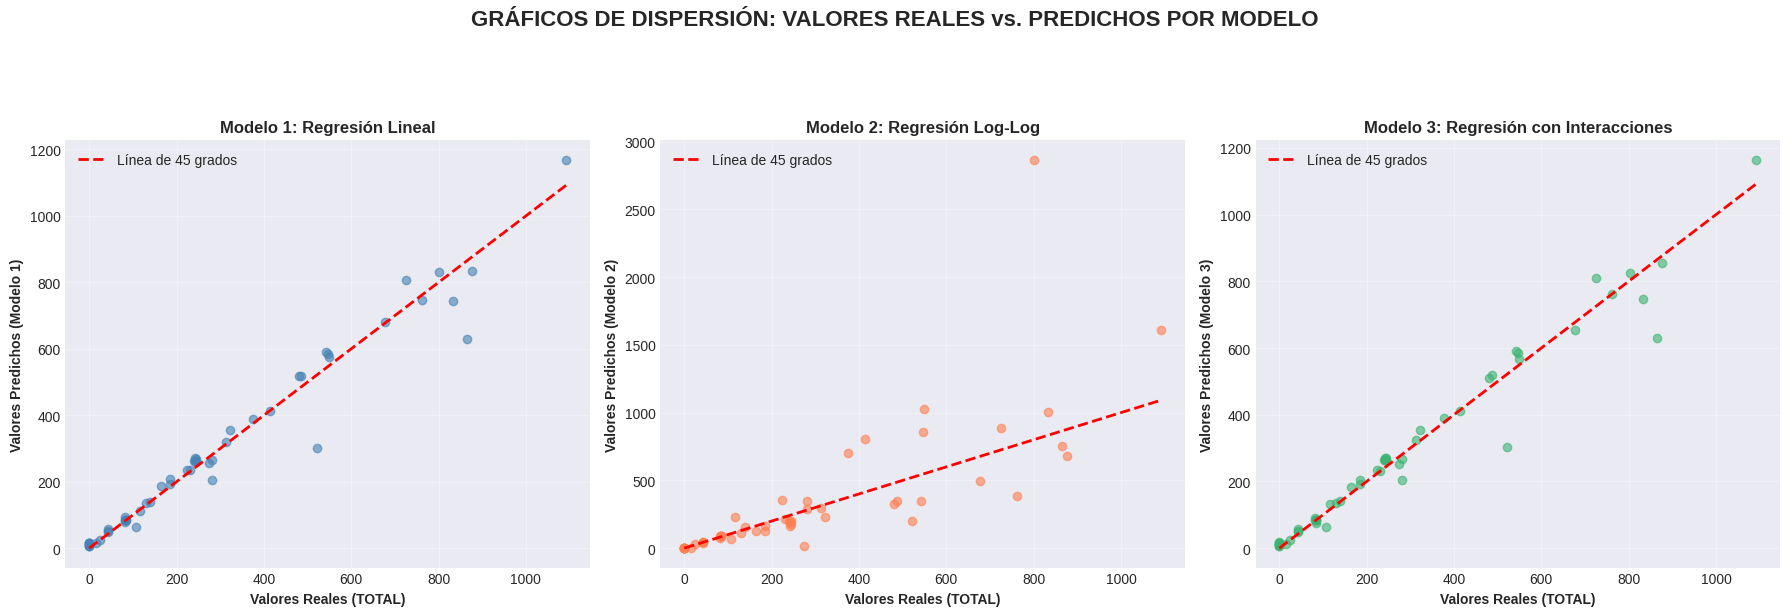

In [8]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
fig.suptitle('GRÁFICOS DE DISPERSIÓN: VALORES REALES vs. PREDICHOS POR MODELO', fontsize=16, fontweight='bold', y=1.05)

# Modelo 1: Lineal
axes[0].scatter(y, modelo1.fittedvalues, alpha=0.6, color='steelblue')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Línea de 45 grados')
axes[0].set_xlabel('Valores Reales (TOTAL)', fontweight='bold')
axes[0].set_ylabel('Valores Predichos (Modelo 1)', fontweight='bold')
axes[0].set_title('Modelo 1: Regresión Lineal', fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Modelo 2: Log-Log (necesitamos transformar de vuelta para comparar con y original)
# y_log es el logaritmo de y+1, fittedvalues es el logaritmo de y_pred+1
y_pred_modelo2 = np.exp(modelo2.fittedvalues) - 1
axes[1].scatter(y, y_pred_modelo2, alpha=0.6, color='coral')
axes[1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Línea de 45 grados')
axes[1].set_xlabel('Valores Reales (TOTAL)', fontweight='bold')
axes[1].set_ylabel('Valores Predichos (Modelo 2)', fontweight='bold')
axes[1].set_title('Modelo 2: Regresión Log-Log', fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Modelo 3: Interacciones
axes[2].scatter(y, modelo3.fittedvalues, alpha=0.6, color='mediumseagreen')
axes[2].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Línea de 45 grados')
axes[2].set_xlabel('Valores Reales (TOTAL)', fontweight='bold')
axes[2].set_ylabel('Valores Predichos (Modelo 3)', fontweight='bold')
axes[2].set_title('Modelo 3: Regresión con Interacciones', fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('/content/grafico_dispersion_modelos.png', dpi=300, bbox_inches='tight')
plt.show()

### Gráficos de Dispersión entre Variables Seleccionadas

A continuación, se presentan gráficos de dispersión para visualizar las relaciones bivariadas entre algunas de las variables más relevantes en el análisis, incluyendo el costo total, mano de obra, semillas, fertilizantes y el área total. Esto nos permite identificar patrones, tendencias y la fuerza de la relación entre ellas.

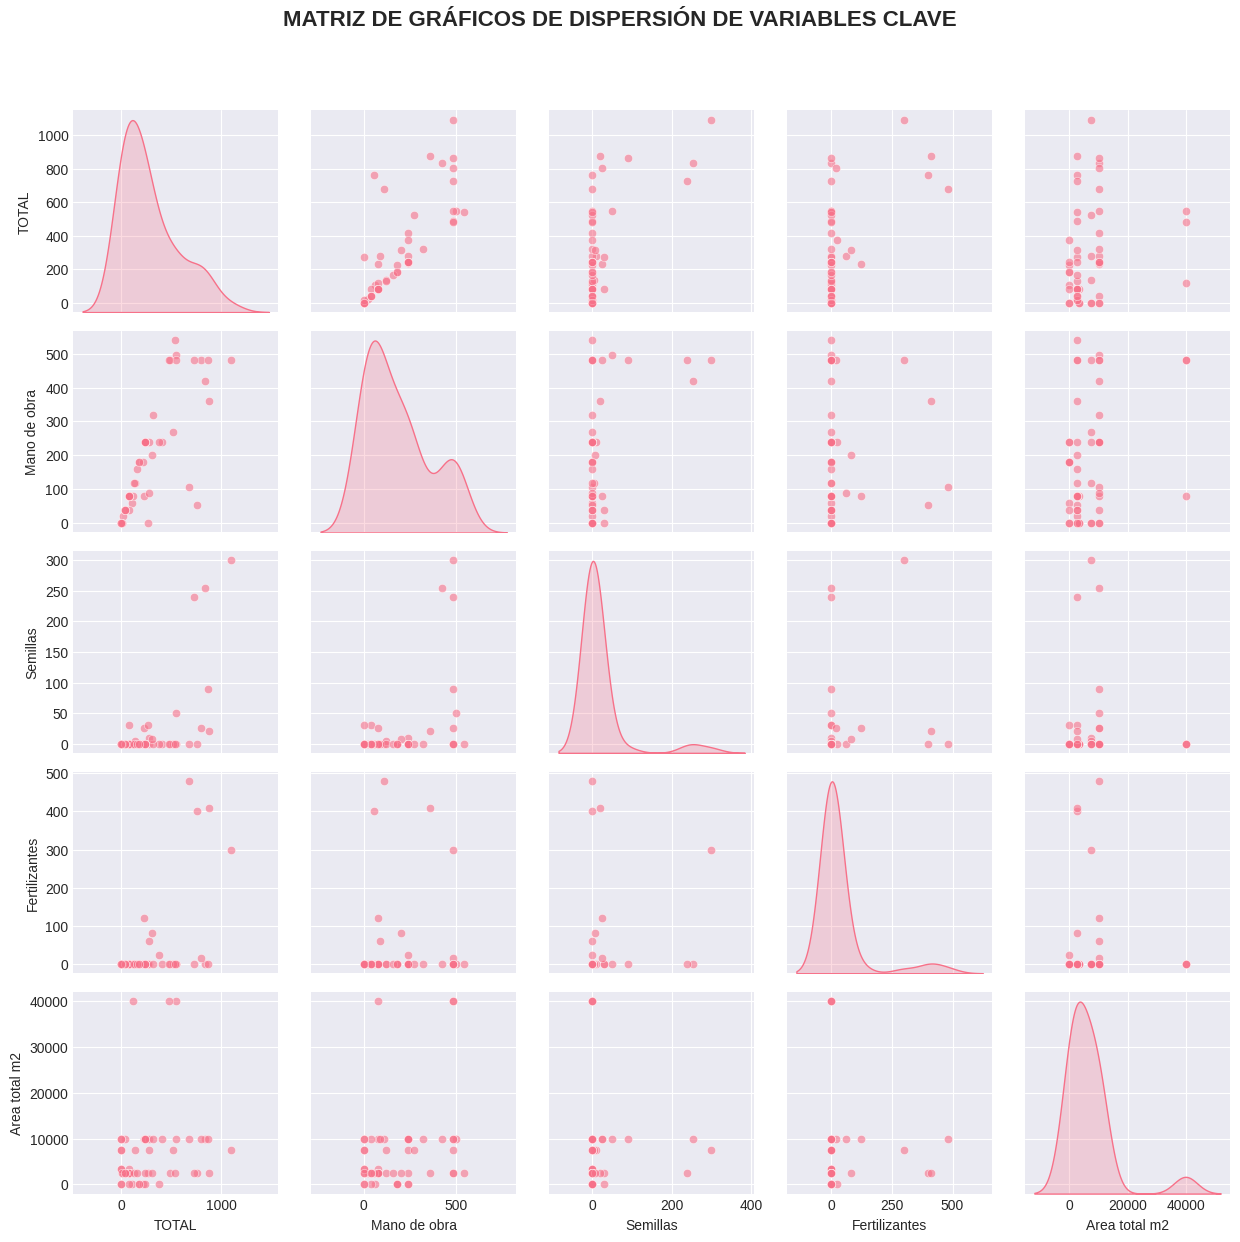

In [9]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Seleccionar variables clave para la matriz de dispersión
variables_relacionadas = ['TOTAL', 'Mano de obra', 'Semillas', 'Fertilizantes', 'Area total m2']

# Crear un PairPlot
sns.pairplot(df[variables_relacionadas], kind='scatter', diag_kind='kde', height=2.5, plot_kws={'alpha':0.6})
plt.suptitle('MATRIZ DE GRÁFICOS DE DISPERSIÓN DE VARIABLES CLAVE', y=1.02, fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig('/content/grafico_11_pairplot_variables.png', dpi=300, bbox_inches='tight')
plt.show()